# Homework #6:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 10/5/2019|
|Updated | 10/6/2019|

## Fourier Transform

### Start with an image
Let's first generate a colored, 2D image using NumPy's __imshow()__ using a dataset consisting of 501 rows and columns (i.e., 501x501), where each element contains a value from -1 to 1 that corresponds to the "intensity" of the pixel (-1 being the darkest, 1 being the brightest, as seen in the color bar to the right). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data1 = np.loadtxt("hw06/circular.txt", float)
plt.imshow(data1)
plt.xlabel('Original')
plt.savefig("hw06/original.png")
plt.colorbar()
plt.xlabel(r'$x$ (pixels)')
plt.ylabel(r'$y$ (pixels)')
plt.show()

<Figure size 640x480 with 2 Axes>

### Slicing the Data
Similarly, we can take a "slice" of the data and look at how the intensity along the first row of pixels in the image (i.e., $y=0$) behaves as a function of $x$.

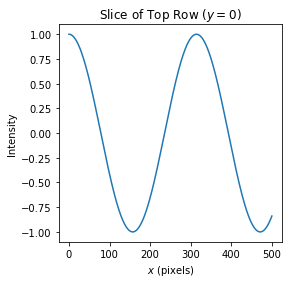

In [2]:
# plot of single line
plt.figure(figsize=[4, 4])
plt.title("Slice of Top Row ($y=0$)")
plt.plot(data1[0])
plt.xlabel(r'$x$ (pixels)')
plt.ylabel('Intensity')
plt.show()

### Fourier Transform Time! (FTT!)

Now we'll compute the Fourier transform of the dataset (i.e., pixel data), using NumPy's __Fast-Fourier Transform__ in two dimensions, __fft.fft2()__, and plot the amplitude spectrum, showing the intensity as a function of frequency (i.e., reciprocal space of the pixels along the $x$ axis).

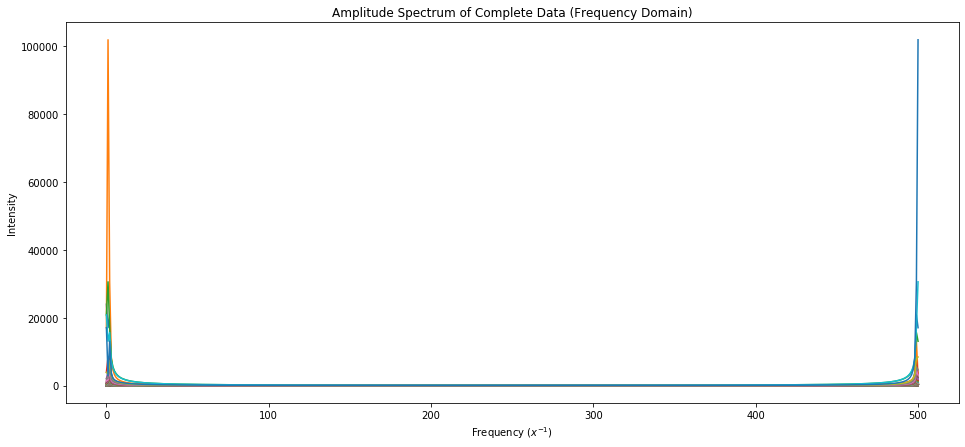

In [3]:
# compute 2D FFT of dataset and store in complex array
c1 = np.fft.fft2(data1)

# plot frequency space
plt.figure(figsize=[16, 7])
plt.title("Amplitude Spectrum of Complete Data (Frequency Domain)")
plt.plot(np.abs(c1))
plt.xlabel(r'Frequency $(x^{-1})$')
plt.ylabel('Intensity')
plt.show()

### Why so many colored plots?

Again, since the 2D image represents a 2D dataset, what we're seeing is the Fourier transform for each single, horizontal line of pixels in the image (i.e., each individual row in the dataset). To see this more clearly, let's only plot the FTs of the first three horizontal lines—or dataset rows—of the image.

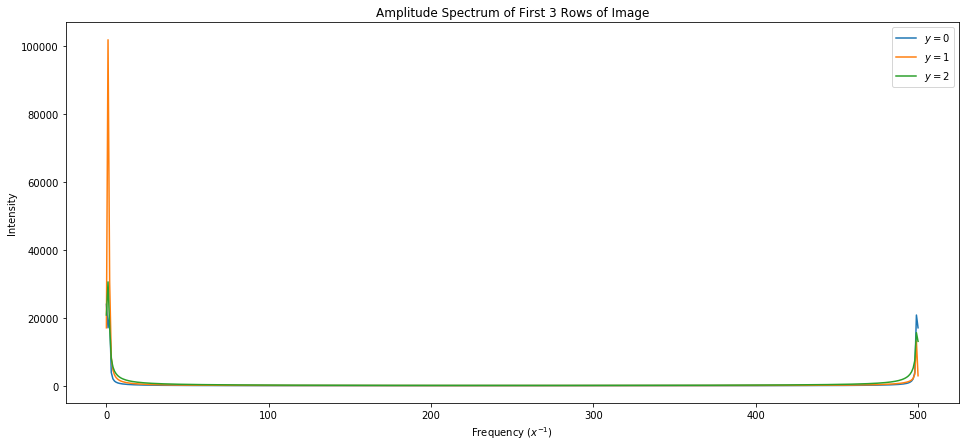

In [4]:
# plot frequency space
plt.figure(figsize=[16, 7])
plt.title("Amplitude Spectrum of First 3 Rows of Image")
plt.plot(np.abs(c1[0]), label='$y=0$')
plt.plot(np.abs(c1[1]), label='$y=1$')
plt.plot(np.abs(c1[2]), label='$y=2$')
plt.legend(loc='best')
plt.xlabel(r'Frequency $(x^{-1})$')
plt.ylabel('Intensity')
plt.show()

The blue line corresponding to $y=0$ is in fact the 1D FT of the "slice" graph we saw earlier.

### Compression Time
Now that we have the FT of the data in hand, we can "compress" the data by "discarding" from it all the coefficients that correspond to very low intensities in frequency space. What should remain is only the most "characteristic waves" of the dataset and the image. We can get an estimate of our _compression efficiency_ by calculating the percentage of total coefficients that are discarded (i.e., set to zero) for any particular intensity threshold.

In [5]:
c2 = np.copy(c1)           # copy coefficient matrix
discard2 = np.abs(c2) < 10 # identify elements of coefficient matrix to discard
c2[discard2] = 0           # set coefficients to discard to 0
e2 = 100*np.count_nonzero(discard2) / 251001
print(e2, "%") # 501 x 501 = 251,001

86.22595129103071 %


We immediately see that discarding coefficients under an intensity value of _just_ __10__ corresponds to getting rid of over 86% of the original data!

Let's do a few more.

In [6]:
c3 = np.copy(c1)          
discard3 = np.abs(c3) < 100
c3[discard3] = 0        
e3 = 100*np.count_nonzero(discard3) / 251001
print(e3, "%")

98.0394500420317 %


In [7]:
c4 = np.copy(c1)          
discard4 = np.abs(c4) < 1000
c4[discard4] = 0        
e4 = 100*np.count_nonzero(discard4) / 251001
print(e4, "%")

99.88326739734104 %


In [8]:
c5 = np.copy(c1)          
discard5 = np.abs(c5) < 10000
c5[discard5] = 0        
e5 = 100*np.count_nonzero(discard5) / 251001
print(e5, "%")

99.99083668989367 %


Finally, we perform an inverse FFT on each newly reduced coefficient matrix to "recover" the data and generate the compressed images.

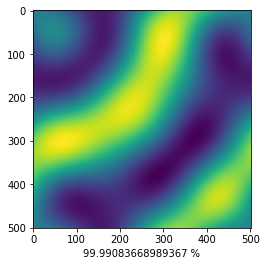

In [9]:
data2 = np.fft.ifft2(c2).real # perform inverse FFT
                              # NOTE: the data type returned is complex
                              # (128-bit), unlike the original "data1"
                              # whose dtype is 64-bit floating point
data3 = np.fft.ifft2(c3).real
data4 = np.fft.ifft2(c4).real
data5 = np.fft.ifft2(c5).real

plt.imshow(data2)
plt.xlabel(str(e2) + " %")
plt.savefig("hw06/compressed2.png")
plt.imshow(data3)
plt.xlabel(str(e3) + " %")
plt.savefig("hw06/compressed3.png")
plt.imshow(data4)
plt.xlabel(str(e4) + " %")
plt.savefig("hw06/compressed4.png")
plt.imshow(data5)
plt.xlabel(str(e5) + " %")
plt.savefig("hw06/compressed5.png")

### Compare Results
Let's compare our compressed images side by side, along with the original image, to see how the quality varies with compression efficiency (see underneath each image).

<center>
<table style="width:100%">
  <tr>
    <td><center><img src="hw06/original.png"></center></td>
    <td><center><img src="hw06/compressed2.png"></center></td>
  </tr>
  <tr>
    <td><center><img src="hw06/compressed3.png"></center></td>
    <td><center><img src="hw06/compressed4.png"></center></td>
  </tr>
  <tr>
    <td colspan="2"><center><img src="hw06/compressed5.png"></center></td>
  </tr>
</table>

As we can see, there's hardly any difference in quality between the original image and the first compression of 86%. In other words, we were able to eliminate up to 86% of the original data with practically no apparent loss in visual quality. With the second compression of 98%, although there is some _dimming_ (compared to the original) of the brightest peaks along the bands—if one looks closely—it is not easy to tell the difference, even when the two are right next to each other. And if you were _only_ shown the 98% image, by itself, it's doubtful anyone would be able to confidently perceive or claim it had been compressed. 

Only when we get to discarding up to 99.8% and 99.99% of the coefficients do we finally see a noticeable loss in image quality, as compared with the original. The 99.8% compressed image clearly shows _compression artifacts_ (e.g., the vertical and horizontal bands), and the 99.99% compressed image starts to not look like the original pattern of circular rings at all.

### JPEG Compression Techniques
The techniques shown here form much of the basis for the __Joint Photographic Expert Group (JPEG)__ compression algorithm, the longtime standard for image file compression. The key differences can be summarized as follows:
- __DCT__: "_The [__Discrete Cosine Transofmration__, or] DCT is the preferred transform used for image compression as it is typically able to incorporate more information from the image in fewer coefficients in comparison to other transforms. This is because the DCT implicitly assumes an even extension of the signal outside the domain from which it is sampled, leading to a continuous extension at the boundaries. This continuity means that the DCT converges to the true signal with fewer terms in comparison to transforms like the Discrete Fourier Transform which can have discontinuities at the boundaries_" (see footnote). For example, compression using FFT can lead to banded distortions in the compressed image.
- __Partitioning__: Instead of applying the transformation to the entire image in one shot, typically the image is broken up, or _partitioned_, into blocks of 8x8 pixels first, before applying any transformation or compression. Afterwards, the blocks are "stitched" back together to form the whole image once again.
- __Quantization__: Instead of simply discarding coefficients that do not meet some arbitrary intensity threshold, the resulting 8x8 coefficient matrices are _element-wise divided_ by the _JPEG standard quantization matrix_ below, and then rounding the entries:

$$ Q = \left(
  \begin{matrix}
    16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 \\
    12 & 12 & 14 & 19 & 26 & 58 & 60 & 55 \\
    14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 \\
    14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 \\
    18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 \\
    24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 \\
    49 & 64 & 78 & 87 & 103 & 121 & 120 & 101 \\
    72 & 92 & 95 & 98 & 112 & 100 & 103 & 99 \\
  \end{matrix} \right) $$


- "_This JPEG quantisation matrix has been optimised through numerous experiments on human vision. The larger entries in the bottom right corner are a consequence of the fact that the human eye is poor at detecting large variations in colour over short distances (i.e. high frequency changes), so when we divide D by these entries of Q and round off, most term of the high frequency will become zero._"

(For more information and sample MATLAB code, see http://www.maths.usyd.edu.au/u/olver/teaching/Computation/ExampleProject.pdf)